### Cifar 10 process usages

In [6]:
import os,nbloader,warnings,sys
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from data.cifar import CIFAR10
from util import plot_imglabels_inarow,augment_img
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print ("Packages loaded.")

Packages loaded.


### Get CIFAR10

In [2]:
# noise_type = [pairflip, symmetric]
noise_type = 'pairflip' 
noise_rate = 0.2
train_dataset = CIFAR10(root='./data/',download=True,train=True,transform=transforms.ToTensor(),
                        noise_type=noise_type,noise_rate=noise_rate)
test_dataset = CIFAR10(root='./data/',download=True,train=False, transform=transforms.ToTensor(),
                       noise_type=noise_type,noise_rate=noise_rate)

Files already downloaded and verified
9 10
50000
Actual noise 0.20
[[0.8 0.2 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.8 0.2 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.8 0.2 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.8 0.2 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.8 0.2 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.8 0.2 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.8 0.2 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.8 0.2 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.8 0.2]
 [0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.8]]
Files already downloaded and verified


### Get training and test data

In [3]:
def one_hot(a, num_classes): # to 1-hot vectors
    return np.squeeze(np.eye(num_classes)[a.reshape(-1)])
x_train = train_dataset.train_data/255. # rgb values between 0~1
n_train = np.shape(x_train)[0]
x_train = x_train.reshape([n_train,-1])
y_train = one_hot(train_dataset.train_labels,10)
y_noisy_train = one_hot(np.asarray(train_dataset.train_noisy_labels),10)
x_test = test_dataset.test_data/255. # rgb values between 0~1
n_test = np.shape(x_test)[0]
x_test = x_test.reshape([n_test,-1])
y_test = one_hot(np.asarray(test_dataset.test_labels),10)
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Print the shape of data
print (x_train.shape,y_train.shape,y_noisy_train.shape,)
print (x_test.shape,y_test.shape,)

(50000, 3072) (50000, 10) (50000, 10)
(10000, 3072) (10000, 10)


### Plot training and test images

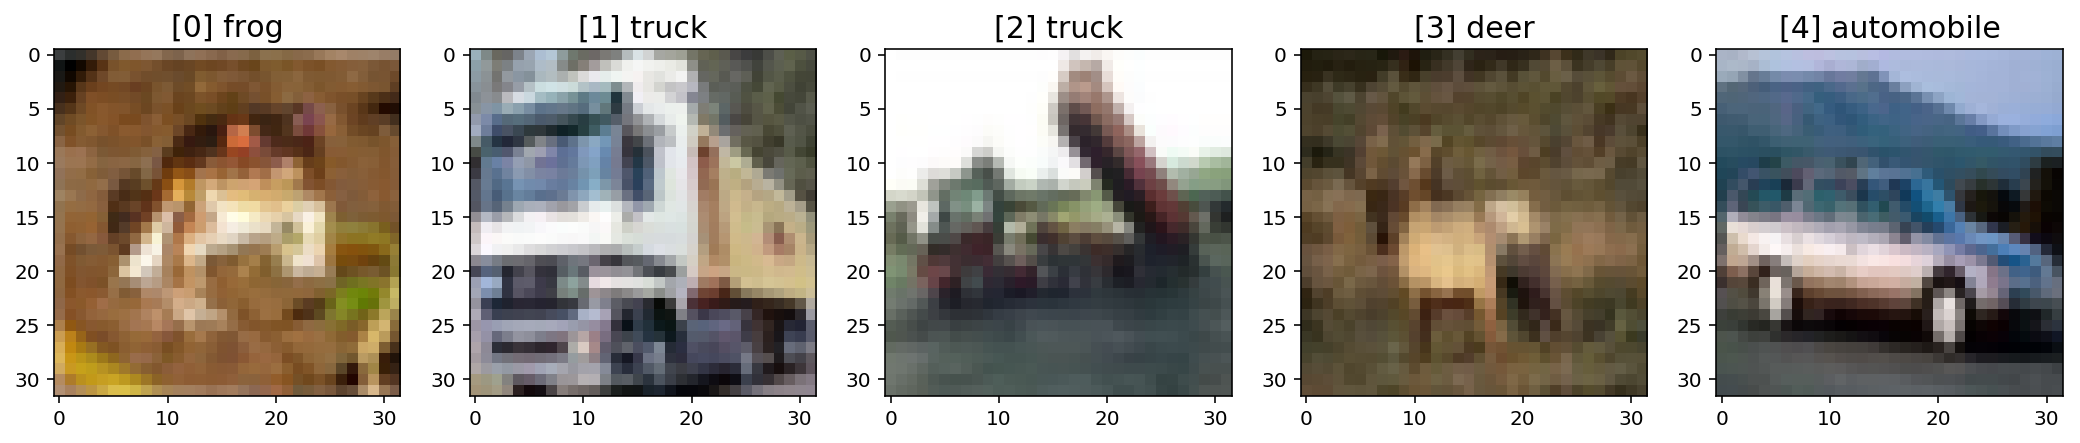

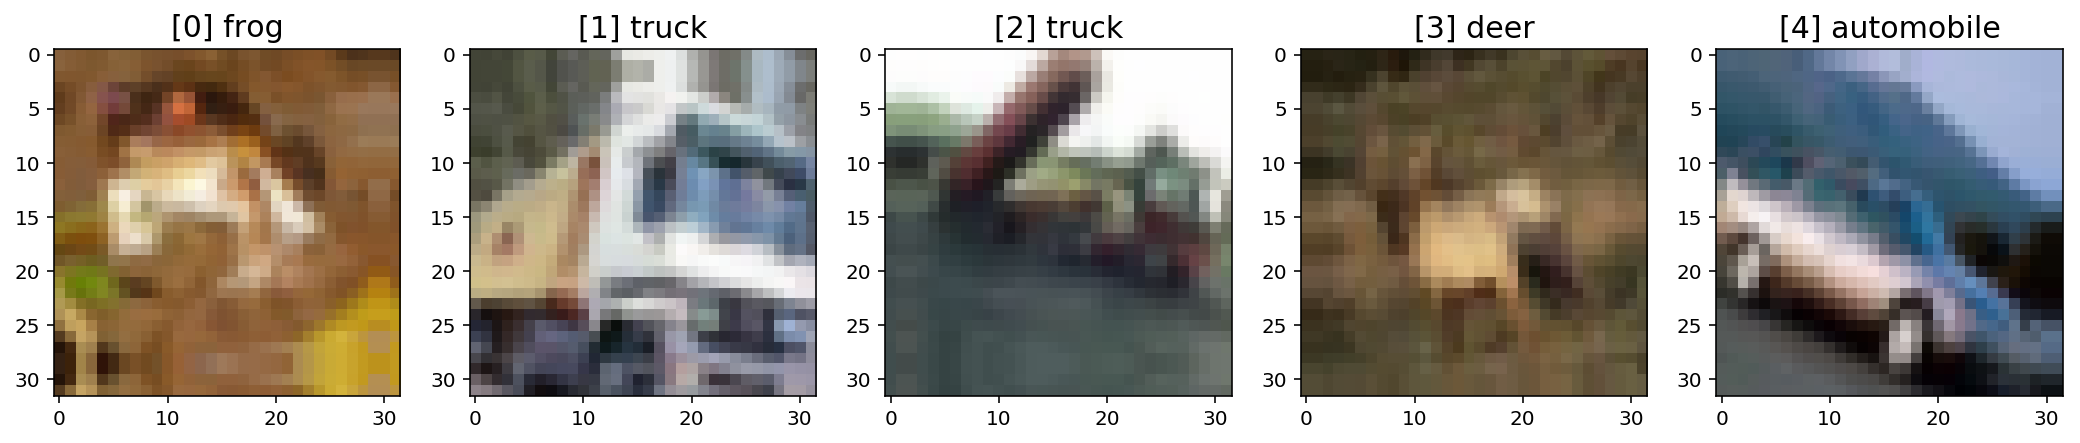

In [4]:
# Plot multiple images 
plot_imglabels_inarow(x_train[:5],y_train[:5],label_names,(32,32,3))
# Plot augmented images
plot_imglabels_inarow(augment_img(x_train[:5],[32,32,3]),y_train[:5],label_names,(32,32,3))

### Plot noisy train images

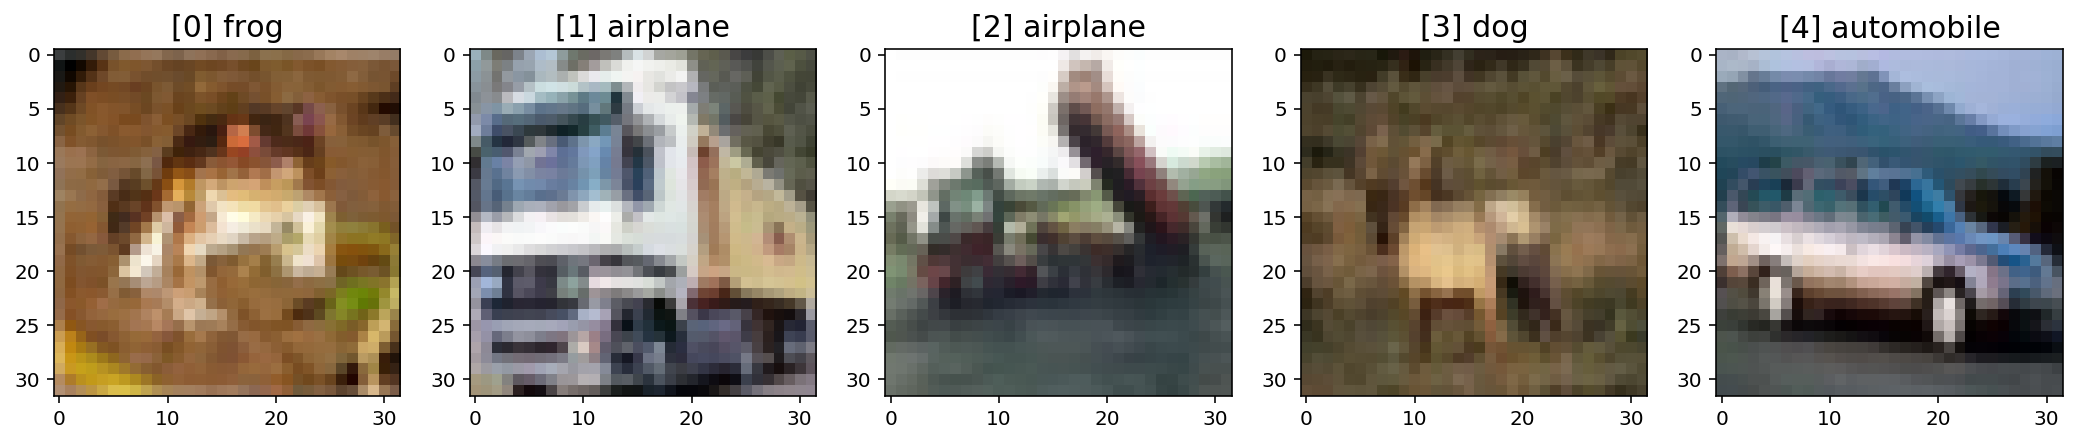

In [5]:
# Plot multiple images 
plot_imglabels_inarow(x_train[:5],y_noisy_train[:5],label_names,(32,32,3))